1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data_w = data.resample('W').mean()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


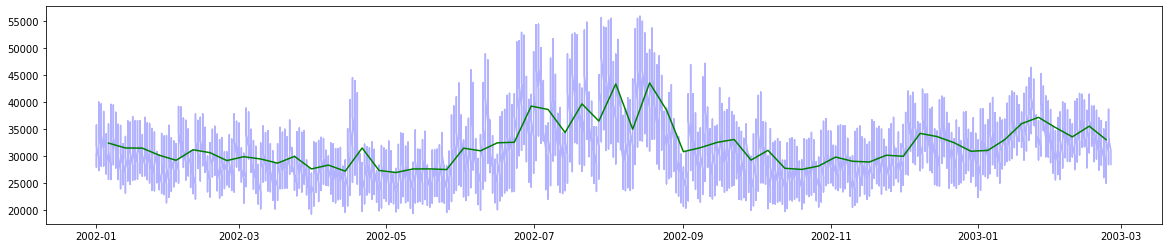

In [4]:
plt.figure(figsize =(20,4))
plt.plot( data.index[:5*24*7*4*3], data['PJME_MW'].values[:5*24*7*4*3], 'b',alpha =0.3 )
plt.plot( data_w.index[:5*4*3], data_w['PJME_MW'].values[:5*4*3], 'g',label='week')

2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

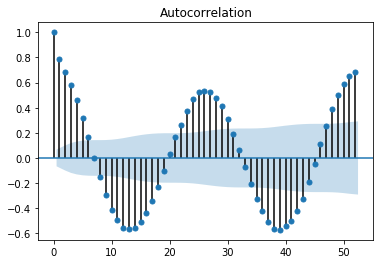

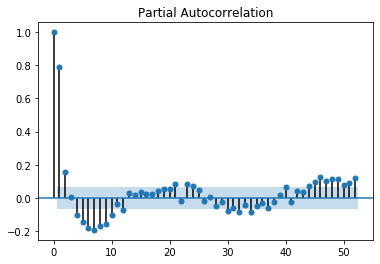

In [5]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values, lags=52)
plt.show()
sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values, lags=52)
plt.show()

In [6]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 0, 0, 52)
SARIMAX: (0, 0, 2) x (0, 0, 0, 52)
SARIMAX: (0, 0, 2) x (0, 0, 1, 52)


In [7]:
data_w['PJME_MW'].values.shape

(866,)

In [26]:
result_aic = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_w['PJME_MW'].values[300:-30],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
            key = f'ARIMA{param}x{param_seasonal}3'
            results = mod.fit()
            print(key, results.aic)
            result_aic[key] = results.aic
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)3 12624.295159952431
ARIMA(0, 0, 0)x(0, 0, 1, 52)3 11068.373238340095
ARIMA(0, 0, 0)x(0, 0, 2, 52)3 9806.343406681191
ARIMA(0, 0, 0)x(0, 1, 0, 52)3 9100.734066398636
ARIMA(0, 0, 0)x(0, 1, 1, 52)3 8077.802988201595
ARIMA(0, 0, 0)x(0, 1, 2, 52)3 7071.153104628822
ARIMA(0, 0, 1)x(0, 0, 0, 52)3 12222.359403009723
ARIMA(0, 0, 1)x(0, 0, 1, 52)3 10949.346180850996
ARIMA(0, 0, 1)x(0, 0, 2, 52)3 9753.545211330733
ARIMA(0, 0, 1)x(0, 1, 0, 52)3 9024.342528152687
ARIMA(0, 0, 1)x(0, 1, 1, 52)3 8008.242886563893
ARIMA(0, 0, 1)x(0, 1, 2, 52)3 6992.1812488575615
ARIMA(0, 0, 2)x(0, 0, 0, 52)3 12107.39430953502
ARIMA(0, 0, 2)x(0, 0, 1, 52)3 10901.714595937956
ARIMA(0, 0, 2)x(0, 0, 2, 52)3 9719.451018634496
ARIMA(0, 0, 2)x(0, 1, 0, 52)3 8997.733061900482
ARIMA(0, 0, 2)x(0, 1, 1, 52)3 7977.063992785462
ARIMA(0, 0, 2)x(0, 1, 2, 52)3 6962.031401472708
ARIMA(0, 1, 0)x(0, 0, 0, 52)3 9900.38903031239
ARIMA(0, 1, 0)x(0, 0, 1, 52)3 8931.05533382582
ARIMA(0, 1, 0)x(0, 0, 2, 52)3 7979.5

In [28]:
min_aic = min(result_aic.values())
min_param = {k:v for k, v in result_aic.items() if v == min_aic}
print(min_param)
i = 0
for param in sorted((v, k) for (k, v) in result_aic.items()):
    i += 1
    print(param)
    if i == 5:
        break
    

{'ARIMA(1, 1, 2)x(0, 1, 2, 52)3': 6869.46663322431}
(6869.46663322431, 'ARIMA(1, 1, 2)x(0, 1, 2, 52)3')
(6882.964557650828, 'ARIMA(0, 1, 2)x(0, 1, 2, 52)3')
(6897.11684967333, 'ARIMA(1, 0, 2)x(0, 1, 2, 52)3')
(6909.57957336541, 'ARIMA(0, 1, 1)x(0, 1, 2, 52)3')
(6914.156748277073, 'ARIMA(2, 1, 2)x(0, 1, 2, 52)3')


ARIMA(1, 1, 2)x(0, 1, 2, 52)3 - AIC:6869.46663322431

In [29]:
#для построения модели используем все данные, кроме 12 последних недель (это будет тестовый набор)
N1 = 300
N2 = 12

mod = sm.tsa.statespace.SARIMAX(data_w['PJME_MW'].values[N1:-N2],order=[1,1,2],
                                seasonal_order=[0,1,2,52] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print(f'AIC:{results_opt.aic}')

AIC:7236.794564932155


4-е значение от текущего: 32101.714651577422


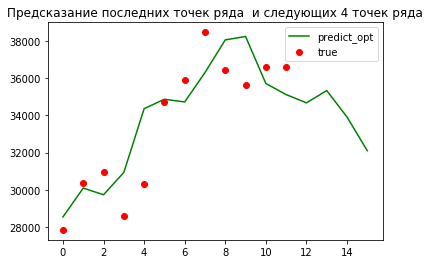

In [30]:
h = 4
nforecast = N2 + h

pred_dynamic_opt = results_opt.forecast(nforecast)
print(f'{h}-е значение от текущего: {pred_dynamic_opt[-1]}')
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_w['PJME_MW'].values[-N2:],'or',label='true')
plt.title(f'Предсказание последних точек ряда  и следующих {h} точек ряда')
plt.legend()

plt.show()

3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

1-е значение от текущего: 34672.10447259421


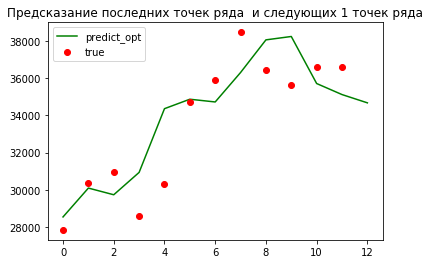

In [31]:
h = 1
N2 = 12
nforecast = N2 + h
pred_dynamic_opt = results_opt.forecast(nforecast)
print(f'{h}-е значение от текущего: {pred_dynamic_opt[-1]}')

plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_w['PJME_MW'].values[-N2:],'or',label='true')
plt.title(f'Предсказание последних точек ряда  и следующих {h} точек ряда')
plt.legend()

plt.show()

4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

In [32]:
data_wc = data_w.copy()
data_wc.drop(['hour', 'dayofweek', 'dayofmonth', 'dayofyear'], axis=1,inplace=True)
data_wc.head()

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,0.000000,0.000000,0.000000


In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns

In [34]:
scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_wc.iloc[:,:-1].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)

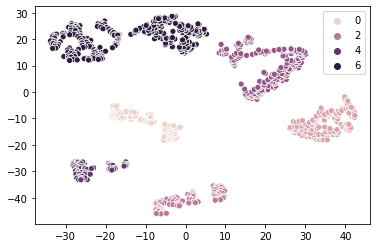

In [35]:
clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

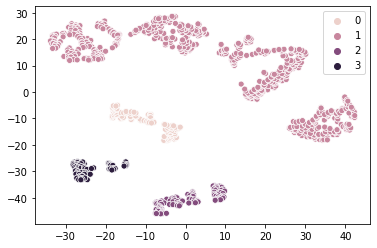

In [36]:
sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_scale_clast )
plt.show()

In [37]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  4
Число кластеров в календаре:  6


In [38]:
data_wc['week_month'] = X_clast
data_wc.iloc[np.where(data_wc['week_month']==0)[0]].iloc[:10,:]

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,week_month
Date,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0.160839,0.0,0.167832,0
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0.142857,0.0,0.142857,0
2002-02-24,29144.130952,2002.0,2.000000,1.0,8.0,0.142857,0.0,0.142857,0
2002-06-02,31448.660714,2002.0,5.285714,2.0,22.0,0.142857,0.0,0.142857,0
2002-09-08,31535.172619,2002.0,9.000000,3.0,36.0,0.142857,0.0,0.142857,0
2002-10-20,27504.827381,2002.0,10.000000,4.0,42.0,0.142857,0.0,0.142857,0
2002-11-17,28881.886905,2002.0,11.000000,4.0,46.0,0.142857,0.0,0.142857,0
2003-01-26,37169.547619,2003.0,1.000000,1.0,4.0,0.142857,0.0,0.142857,0
2003-02-23,33023.458333,2003.0,2.000000,1.0,8.0,0.142857,0.0,0.142857,0


In [39]:
data_wc.iloc[np.where(data_wc['week_month']==2)[0]].iloc[:10,:]

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,week_month
Date,,,,,,,,,
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0.0,0.142857,0.0,2
2002-02-17,30616.565476,2002.0,2.000000,1.0,7.0,0.0,0.142857,0.0,2
2002-05-26,27480.416667,2002.0,5.000000,2.0,21.0,0.0,0.142857,0.0,2
2002-09-01,30796.785714,2002.0,8.142857,3.0,35.0,0.0,0.142857,0.0,2
2002-10-13,27714.601190,2002.0,10.000000,4.0,41.0,0.0,0.142857,0.0,2
2002-11-10,29018.077381,2002.0,11.000000,4.0,45.0,0.0,0.142857,0.0,2
2003-01-19,35999.547619,2003.0,1.000000,1.0,3.0,0.0,0.142857,0.0,2
2003-02-16,35533.589286,2003.0,2.000000,1.0,7.0,0.0,0.142857,0.0,2
2003-05-25,27125.708333,2003.0,5.000000,2.0,21.0,0.0,0.142857,0.0,2


In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
Xpca.shape

(866, 2)

In [41]:
data_wc['pca1']=Xpca[:,0]
data_wc['pca2']=Xpca[:,1]
data_wc.head()

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,week_month,pca1,pca2
Date,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0.160839,0.000000,0.167832,0,-2.394398,1.785615
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,0.000000,0.000000,0.000000,1,-2.656037,-0.249297
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0.000000,0.142857,0.000000,2,-2.279921,1.494300
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0.142857,0.000000,0.142857,0,-2.314367,1.538043
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,0.000000,0.000000,0.000000,1,-2.470133,-0.283289


In [42]:
first_diff =np.array(data_wc.iloc[1:,0].values - data_wc.iloc[:-1,0].values).astype('float32') 
data_wc['diff1'] = 0.0
data_wc['diff1'] =  data_wc['diff1'].astype('float') 
data_wc['diff1'].values[1:] = first_diff 
data_wc.head()

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,week_month,pca1,pca2,diff1
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0.160839,0.000000,0.167832,0,-2.394398,1.785615,0.000000
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,0.000000,0.000000,0.000000,1,-2.656037,-0.249297,-904.773926
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0.000000,0.142857,0.000000,2,-2.279921,1.494300,-34.505951
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0.142857,0.000000,0.142857,0,-2.314367,1.538043,-1311.351196
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,0.000000,0.000000,0.000000,1,-2.470133,-0.283289,-945.041687


In [43]:
data_wc['d_w4']=data_wc['PJME_MW'].rolling(window=4).mean()
data_wc['d_w4'][:3] = 0
data_wc.head()

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,week_month,pca1,pca2,diff1,d_w4
Date,,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0.160839,0.000000,0.167832,0,-2.394398,1.785615,0.000000,0.000000
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,0.000000,0.000000,0.000000,1,-2.656037,-0.249297,-904.773926,0.000000
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0.000000,0.142857,0.000000,2,-2.279921,1.494300,-34.505951,0.000000
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0.142857,0.000000,0.142857,0,-2.314367,1.538043,-1311.351196,31368.489615
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,0.000000,0.000000,0.000000,1,-2.470133,-0.283289,-945.041687,30569.571429


In [44]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_wc['exp_0_01'] = exponential_smoothing(data_wc['PJME_MW'], 0.01)
data_wc['exp_0_05'] = exponential_smoothing(data_wc['PJME_MW'], 0.05)
data_wc['exp_0_08'] = exponential_smoothing(data_wc['PJME_MW'], 0.08)

In [45]:
data_wc.head()

,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,week_month,pca1,pca2,diff1,d_w4,exp_0_01,exp_0_05,exp_0_08
Date,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0.160839,0.000000,0.167832,0,-2.394398,1.785615,0.000000,0.000000,32392.160839,32392.160839,32392.160839
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,0.000000,0.000000,0.000000,1,-2.656037,-0.249297,-904.773926,0.000000,32383.113100,32346.922142,32319.778924
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0.000000,0.142857,0.000000,2,-2.279921,1.494300,-34.505951,0.000000,32373.810778,32302.220083,32250.427087
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0.142857,0.000000,0.142857,0,-2.314367,1.538043,-1311.351196,31368.489615,32351.487968,32194.185567,32081.715301
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,0.000000,0.000000,0.000000,1,-2.470133,-0.283289,-945.041687,30569.571429,32319.937969,32044.300693,31850.897124


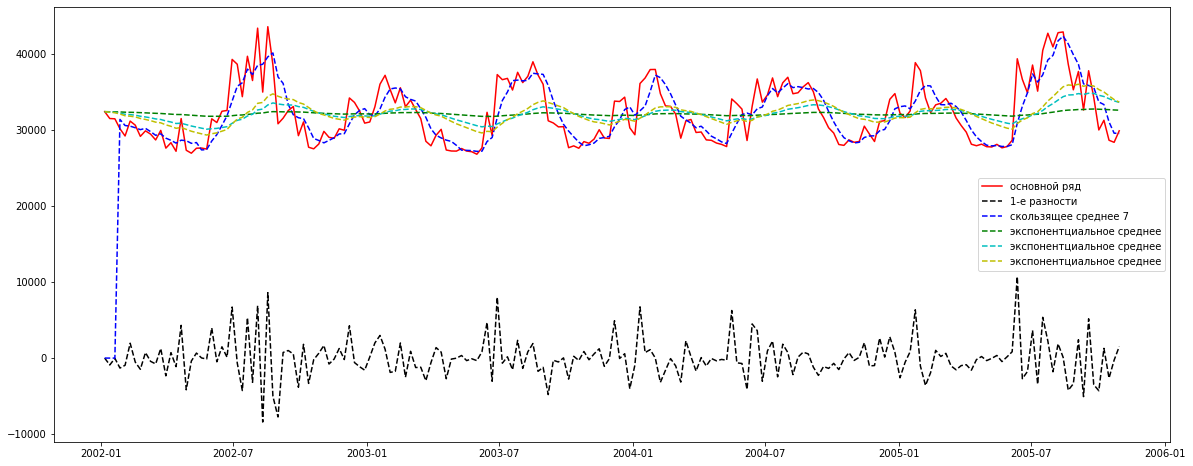

In [46]:
plt.figure(figsize =(20,8))
N100=200
plt.plot(data_wc.index[:N100],data_wc['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_wc.index[:N100],data_wc['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_wc.index[:N100],data_wc['d_w4'][:N100],'--b',label ='скользящее среднее 7')
plt.plot(data_wc.index[:N100],data_wc['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее')
plt.plot(data_wc.index[:N100],data_wc['exp_0_05'][:N100],'--c',label ='экспонентциальное среднее')
plt.plot(data_wc.index[:N100],data_wc['exp_0_08'][:N100],'--y',label ='экспонентциальное среднее')
plt.legend()
plt.show()

In [50]:
scl_target = StandardScaler() 
h = 4
target = data_wc['PJME_MW'].values[h:].reshape((data_wc.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(862, 1)

In [51]:
scl_x = StandardScaler() 

X = data_wc.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(862, 16)

In [55]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_regression

sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(862, 5)

In [56]:
column_names = data_wc.columns[sfk.get_support()]
column_names

Index(['PJME_MW', 'diff1', 'd_w4', 'exp_0_05', 'exp_0_08'], dtype='object')

In [57]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(862, 2)

In [59]:
column_namesp = data_wc.columns[sfp.get_support()]
column_namesp

Index(['PJME_MW', 'd_w4'], dtype='object')

In [60]:
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(862, 5)

In [62]:
column_namesfm = data_wc.columns[sfm.get_support()]
column_namesfm

Index(['PJME_MW', 'month', 'weekofyear', 'pca1', 'exp_0_08'], dtype='object')

In [73]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 11 12 14 15]
Номера признаков лучших признаков по процентной форме:  [ 0 12]
Номера признаков для выбора по модели :  [ 0  2  4  9 15]


In [82]:
list_params = np.union1d(np.union1d(list_param_k, list_param_p), list_param_m)
list_params

array([ 0,  2,  4,  9, 11, 12, 14, 15])

In [84]:
X_new = X[:,list_params]
data_wc.columns[list_params]

Index(['PJME_MW', 'month', 'weekofyear', 'pca1', 'diff1', 'd_w4', 'exp_0_05',
       'exp_0_08'],
      dtype='object')

In [88]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

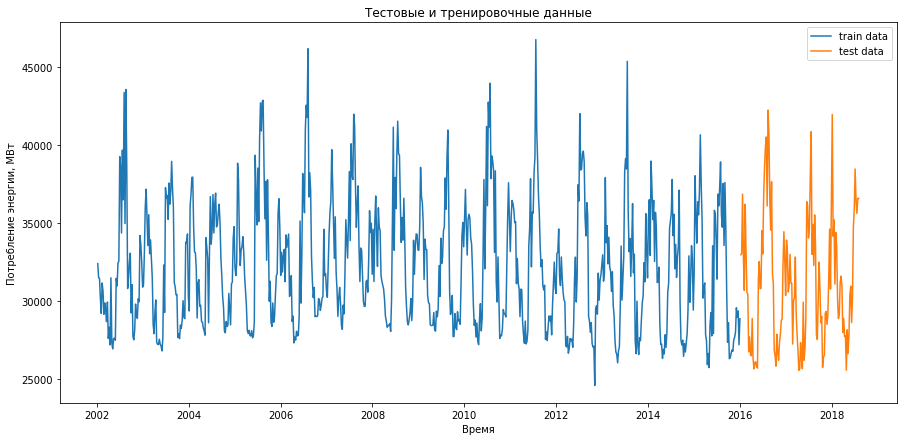

In [89]:
train, test = split_data( data_wc, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [90]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]
train.shape

(731, 16)

In [91]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [92]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [93]:
X_test.shape

(131, 8)

In [94]:
y_test_pred_g = model_g.predict(X_test)

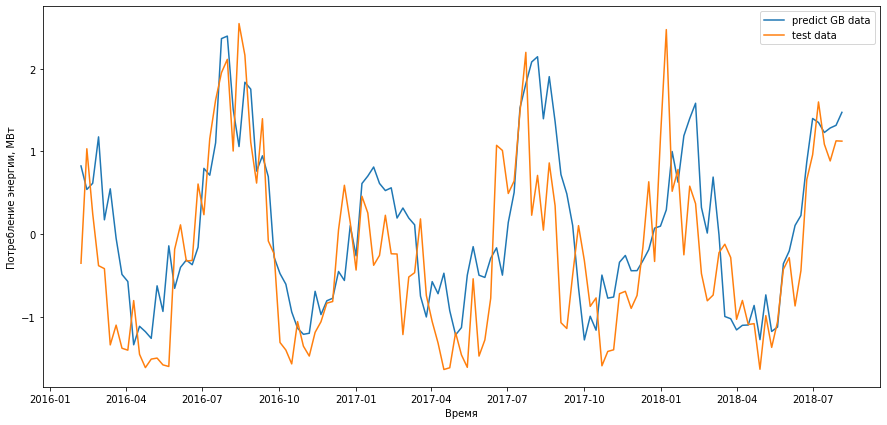

In [96]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h:],y_test, label='test data')

plt.legend()
plt.show()

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [98]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.6097373360345946 
ошибка mae  :   0.6241888466115454 
оценка R2 :   0.4216658572266244


In [99]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [100]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   8.136221265497511 %


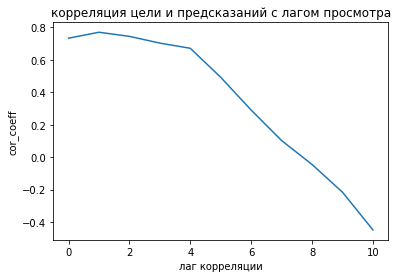

In [101]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция цели и предсказаний с лагом просмотра')
plt.show()

In [102]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,10,14,5], 
              "n_estimators":[100,200,300,400,500, 1000, 1200,1500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.602 (std: 0.056)
Parameters: {'n_estimators': 200, 'max_depth': 2}

Model with rank: 2
Mean validation score: 0.594 (std: 0.055)
Parameters: {'n_estimators': 300, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.581 (std: 0.062)
Parameters: {'n_estimators': 100, 'max_depth': 3}



In [107]:
model_g_best = GradientBoostingRegressor(max_depth=2,  n_estimators=200)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.6018617902776375 %


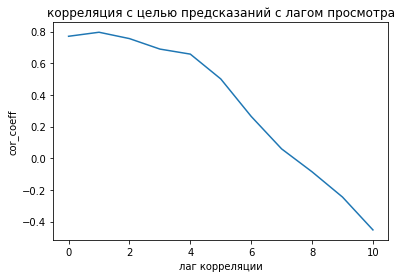

In [108]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

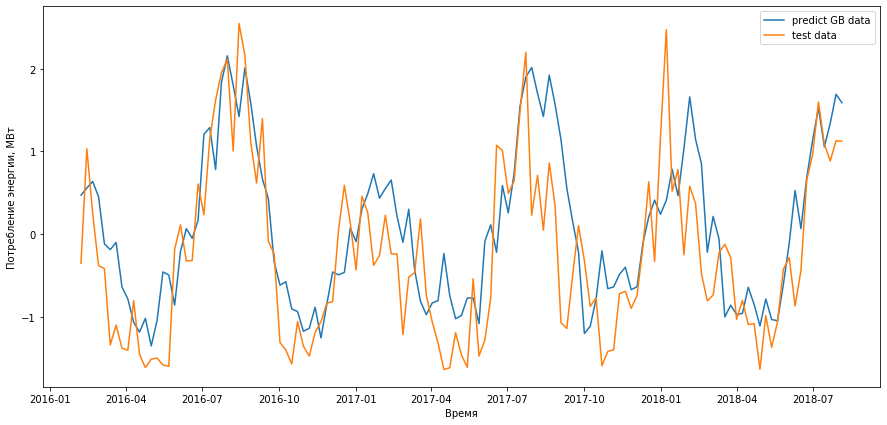

In [109]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h:],y_test, label='test data')

plt.legend()
plt.show()

In [110]:
import pickle
# save the model to disk
filename = 'final_model.sav'
pickle.dump(model_g_best, open(filename, 'wb'))

filename = 'final_scaler_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))

5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреденение по десяткам точек)

In [116]:
# 'PJME_MW', 'month', 'weekofyear', 'pca1', 'diff1', 'd_w4', 'exp_0_05', 'exp_0_08'
X_test_100 = X_test.copy()
y_test_100 = y_test.copy()
X_test_100.shape

(131, 8)

In [137]:
p = 5
N10 = 10 + p
for i in range(p, N10+p):
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,X_test_100.shape[1])))
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]
    #строим 'exp_0_05', 'exp_0_08'
    X_test_100[i+1,6] = X_test_100[i,6]*(1-0.05)+ 0.05 * X_test_100[i+1,0]
    X_test_100[i+1,7] = X_test_100[i,7]*(1-0.08)+ 0.08 * X_test_100[i+1,0]
    #строим 'd_w4' - признак под номером 5
    X_test_100[i+1,5] = np.mean(X_test_100[i-3:i+1,0]) 
    #строим 'diff1' - признак под номером 4
    X_test_100[i+1,4] = X_test_100[i, 0] - X_test_100[i+1, 0] 
    # обновим историю значенний
    X_test_100[i+1, 1] = X_test_100[i, 1]
    X_test_100[i+1, 2] = X_test_100[i, 2]
    
    X_test_100[i+1, 3] = X_test_100[i, 3]

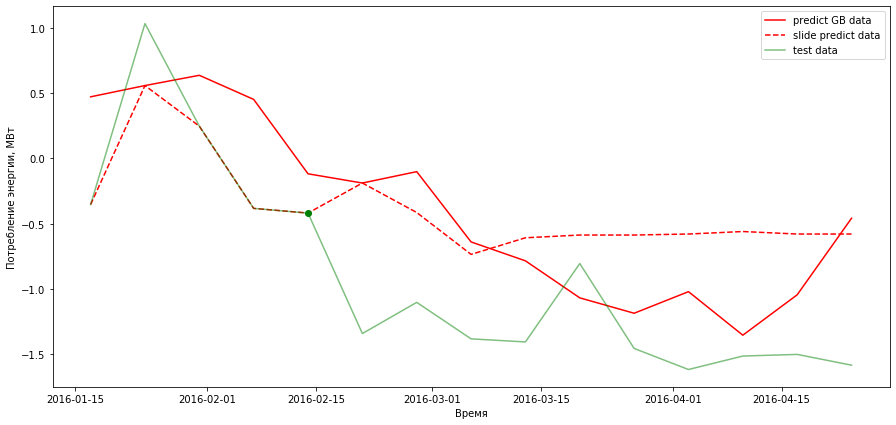

In [138]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[p],y_test[p-1], 'og', alpha=1)
plt.legend()
plt.show()  

6. Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.

In [139]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[p:N10]),y_pred = scl_target.inverse_transform( y_test_100[p:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   12.534897919785386 %
